In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
iris_ds = pd.read_csv(r"E:\MLP\Machine Learning\pure classification\Iris.csv")
iris_ds

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_ds.shape

(150, 6)

In [4]:
iris_ds.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
iris_ds.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iris_ds['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
x = iris_ds.iloc[:,:-1]
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [8]:
y = iris_ds.iloc[:,-1]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [9]:
le = LabelEncoder()
y_trf = le.fit_transform(y)
y_trf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
y_trf.dtype

dtype('int32')

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y_trf,test_size=0.2,random_state=25)
x_train,x_test,y_train,y_test

(      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 54    55            6.5           2.8            4.6           1.5
 113  114            5.7           2.5            5.0           2.0
 135  136            7.7           3.0            6.1           2.3
 4      5            5.0           3.6            1.4           0.2
 115  116            6.4           3.2            5.3           2.3
 ..   ...            ...           ...            ...           ...
 118  119            7.7           2.6            6.9           2.3
 61    62            5.9           3.0            4.2           1.5
 143  144            6.8           3.2            5.9           2.3
 62    63            6.0           2.2            4.0           1.0
 132  133            6.4           2.8            5.6           2.2
 
 [120 rows x 5 columns],
       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 28    29            5.2           3.4            1.4           0.2
 72    73            

In [12]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 5), (30, 5), (120,), (30,))

In [13]:
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [14]:
y_train_pred = dt.predict(x_train)
y_train_pred

array([1, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0,
       0, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       1, 0, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 0,
       2, 0, 0, 1, 1, 2, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0,
       1, 2, 1, 0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 1,
       0, 2, 1, 2, 2, 2, 1, 2, 1, 2])

In [15]:
y_test_pred = dt.predict(x_test)
y_test_pred

array([0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 2, 0])

In [16]:
cr = classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        42

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [17]:
cm = confusion_matrix(y_train,y_train_pred)
cm

array([[41,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 42]], dtype=int64)

In [18]:
cm_test= confusion_matrix(y_test,y_test_pred)
cm_test

array([[ 9,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  8]], dtype=int64)

In [19]:
cr_test = classification_report(y_test,y_test_pred)
print(cr_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



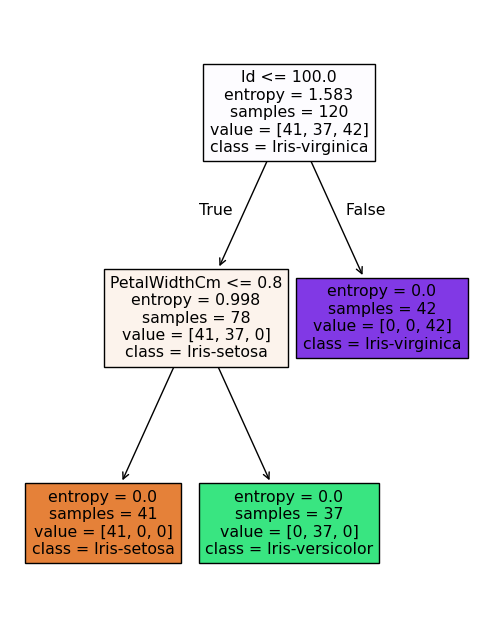

In [20]:
plt.figure(figsize=(6,8))
tree.plot_tree(dt,feature_names=x.columns,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],filled=True,)
plt.show()

In [21]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
y_train_pred = DT.predict(x_train)
y_test_pred = DT.predict(x_test)
cm = confusion_matrix(y_train,y_train_pred)
cm_test= confusion_matrix(y_test,y_test_pred)
cr_test = classification_report(y_test,y_test_pred)
print(cr_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



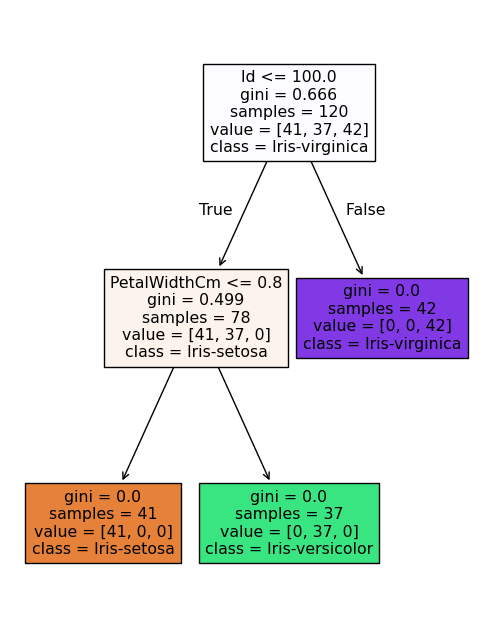

In [23]:
plt.figure(figsize=(6,8))
tree.plot_tree(DT,feature_names=x.columns,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],filled=True,)
plt.show()